In [1]:
using Plots
using LaTeXStrings
using Printf
using DifferentialEquations


default(dpi=300)

In [2]:
function V_eff(r, Lz)
    return 0.5 * (1 - 2/r) * (Lz^2 / r^2)
end

V_eff (generic function with 1 method)

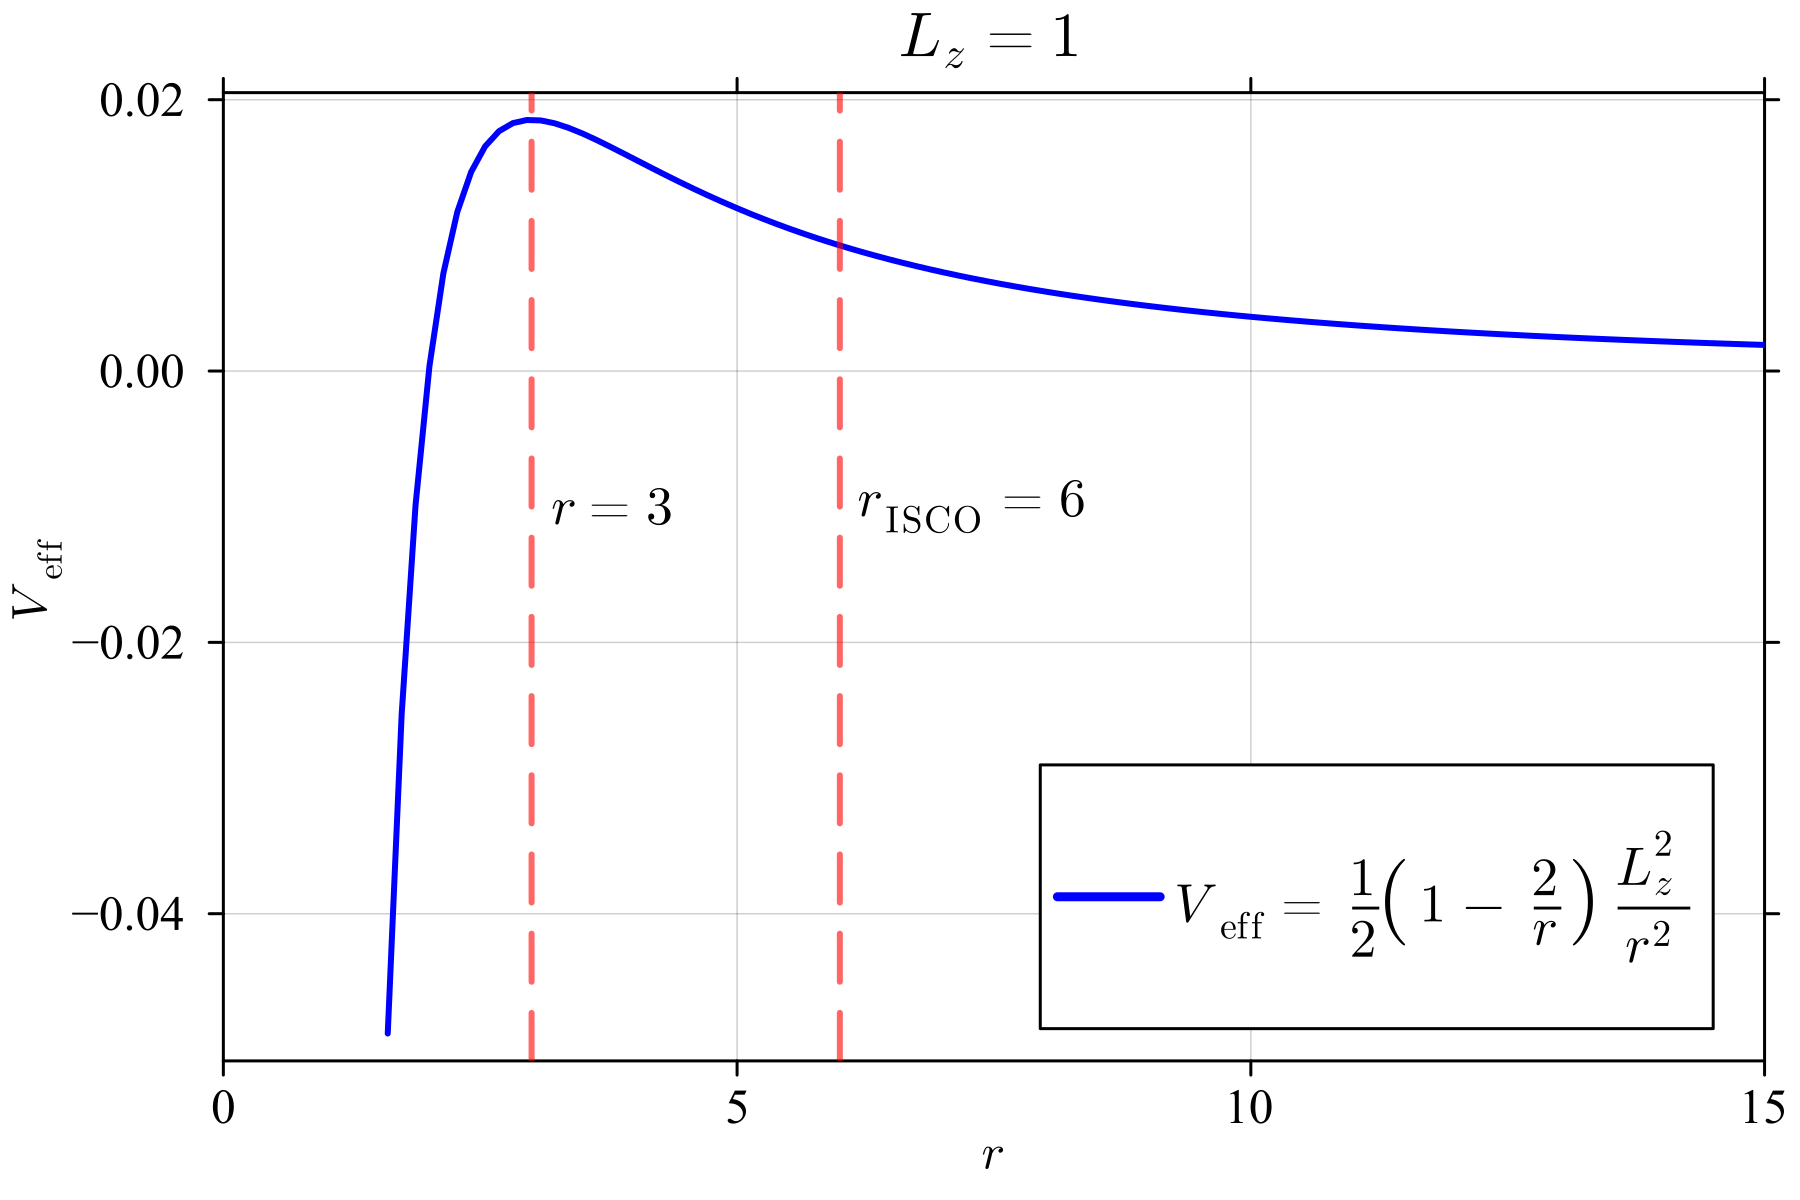

In [3]:
r_min = 1.6  # Avoiding r = 2 to prevent singularity
r_max = 15.0
r_values = range(r_min, r_max, length=100)

# Define the angular momentum L (you can adjust this value as needed)
Lz = 1.0

# Calculate the potential for each r value
V_values = [V_eff(r, Lz) for r in r_values]

# Plot the potential
plot(r_values, V_values, label=L"V_{\mathrm{eff}} = \frac{1}{2}\left(1 - \frac{2}{r} \right) \frac{L_{z}^2}{r^2}", 
     xlabel=L"r", ylabel=L"V_{\mathrm{eff}}", title = L"L_{z} = 1", lw=2, legendfontsize=12,
     xtickfont=font(10, "Times New Roman"), ytickfont=font(10, "Times New Roman"),
     tick_direction=:out, framestyle=:box, linewidth=2, color=:blue, xlims=(0, r_max))

# Add vertical lines at r = 3 and r = 6
vline!([3, 6], lw=2, color=:red, linestyle=:dash, alpha=0.6, label=false)  # Vertical lines without labels
# Add annotations near the vertical lines
annotate!(3.8, -0.01, text(L"r = 3", 12, :black))
annotate!(7.3, -0.01, text(L"r_{\mathrm{ISCO}} = 6", 12, :black))

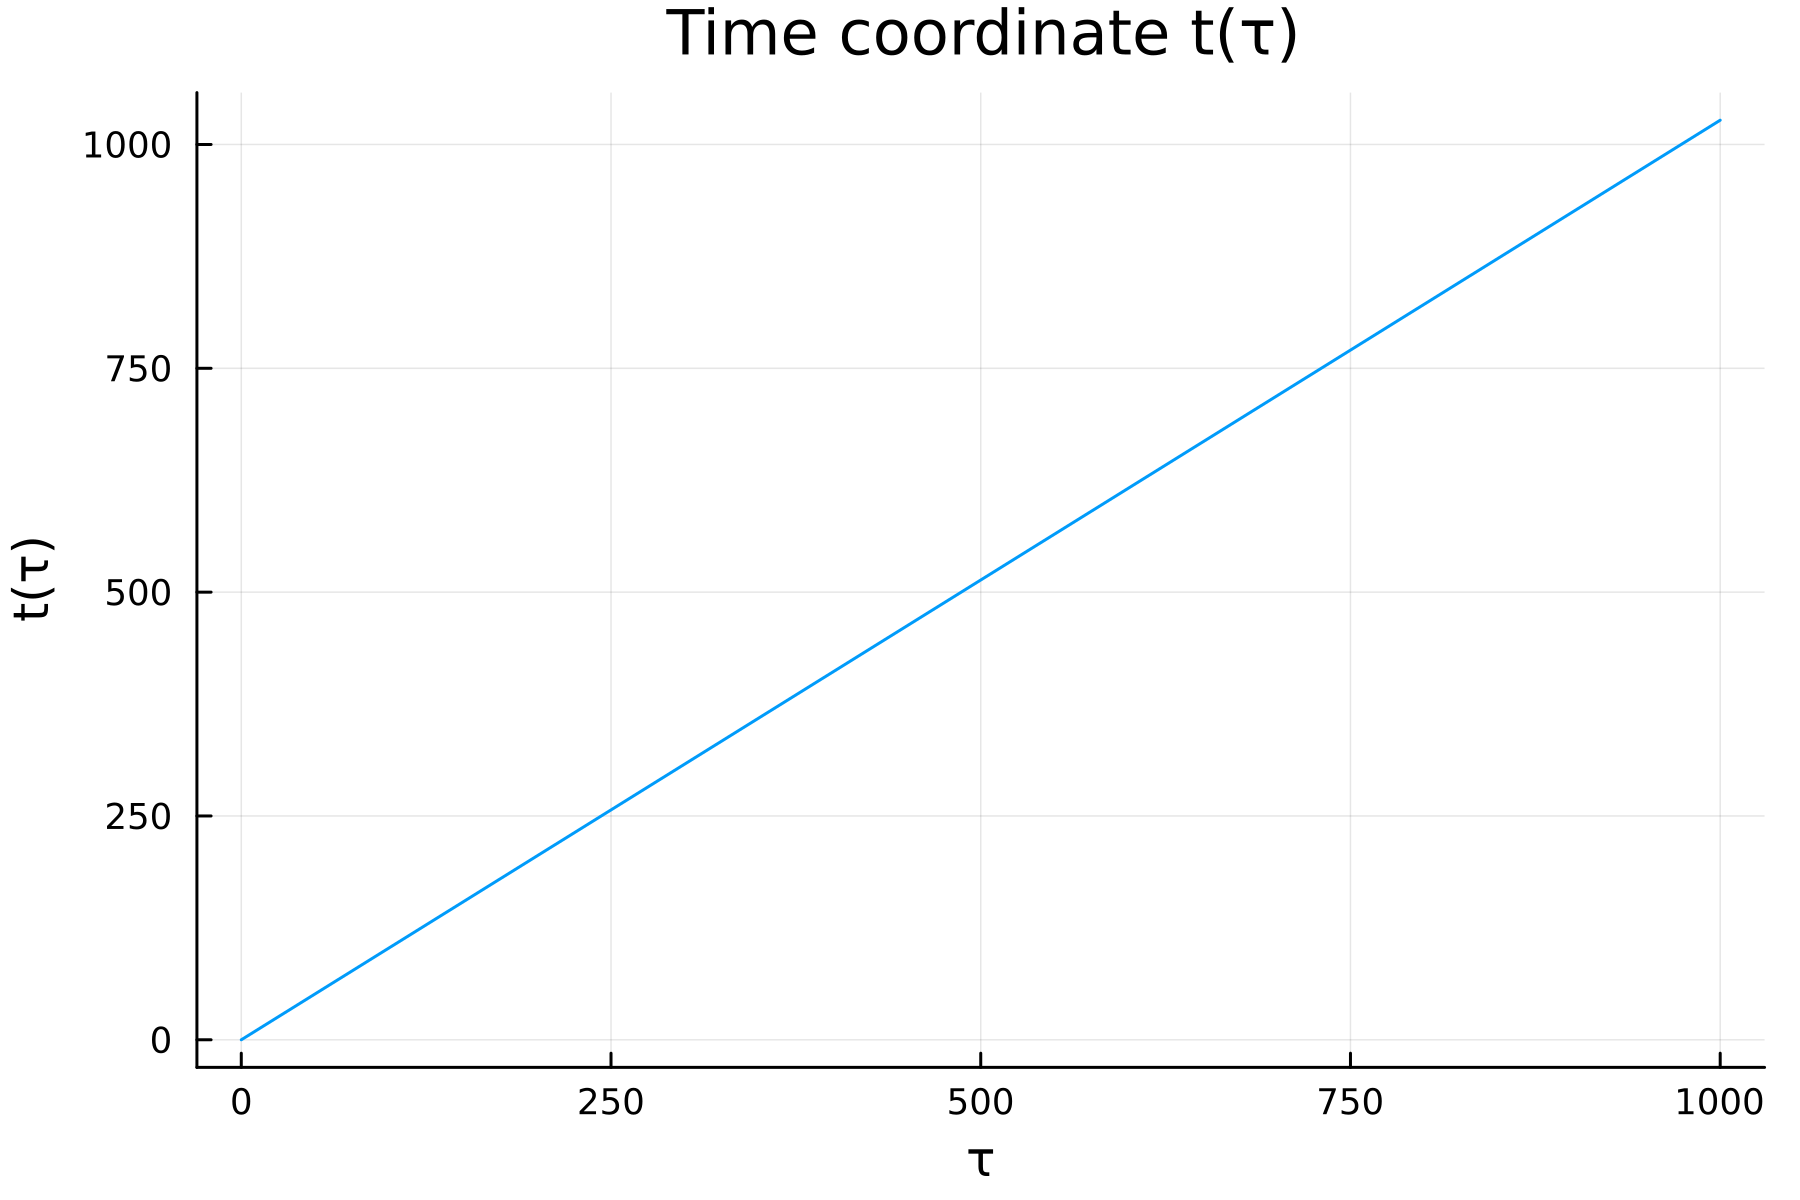

In [4]:

# Constants
G = 1.0  # Set G = 1
M = 1.0  # Set M = 1
e = 1.0  # energy (arbitrary for this example)
l_z = 1.0  # specific angular momentum (arbitrary for this example)

# Differential equations
function equations!(du, u, p, τ)  # Updated signature to include `p`
    r, ur, φ, t = u
    du[1] = ur  # dr/dτ
    du[2] = - G * M / r^2 + l_z^2 / r^3 - (3 * G * M * l_z^2) / r^4  # du_r/dτ
    du[3] = l_z / r^2  # dφ/dτ
    du[4] = e / (1 - 2 * G * M / r)  # dt/dτ
end

# Initial conditions
r_0 = 1.0e2   # initial radial distance (adjust to fit the new units)
ur_0 = 0.0    # initial radial velocity
φ_0 = 0.0     # initial angular position
t_0 = 0.0     # initial time
u0 = [r_0, ur_0, φ_0, t_0]  # initial state vector

# Time span (τ values)
τspan = (0.0, 1e3)  # Adjust to suit the new scale

# Solve the system of equations
prob = ODEProblem(equations!, u0, τspan)
sol = solve(prob, Tsit5(), saveat=1000)

# Extract results
r_vals = sol[1, :]
ur_vals = sol[2, :]
φ_vals = sol[3, :]
t_vals = sol[4, :]
τ_vals = sol.t

# Plot results
plot(τ_vals, r_vals, xlabel="τ", ylabel="r(τ)", title="Radial distance r(τ)", legend=false)
plot(τ_vals, ur_vals, xlabel="τ", ylabel="u_r(τ)", title="Radial velocity u_r(τ)", legend=false)
plot(τ_vals, φ_vals, xlabel="τ", ylabel="φ(τ)", title="Angular position φ(τ)", legend=false)
plot(τ_vals, t_vals, xlabel="τ", ylabel="t(τ)", title="Time coordinate t(τ)", legend=false)